In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
df = pd.read_excel("data\Seoul bicycle rental dataset.xlsx")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(蚓)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(蚓)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [9]:
df.Date = pd.to_datetime(df.Date)

df['Day'] = df.Date.dt.day_name().str.slice(0, 3)

In [10]:
df.sample()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day
3950,2018-05-14,1124,14,23.1,56,1.6,391,13.8,2.67,0.0,0.0,Spring,No Holiday,Yes,Mon


In [11]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [12]:
tf = df[df.Day.isin(["Mon","Tue","Wed","Thu","Fri"])]
tf = tf[(tf.Hour>=8) & (tf.Hour<=17)]

g1 = tf[tf.Seasons=="Autumn"]
g1 = g1.groupby("Hour")["Rented Bike Count"].mean()

g2 = tf[tf.Seasons=="Summer"]
g2 = g2.groupby("Hour")["Rented Bike Count"].mean()

g3 = tf[tf.Seasons=="Spring"]
g3 = g3.groupby("Hour")["Rented Bike Count"].mean()

g4 = tf[tf.Seasons=="Winter"]
g4 = g4.groupby("Hour")["Rented Bike Count"].mean()

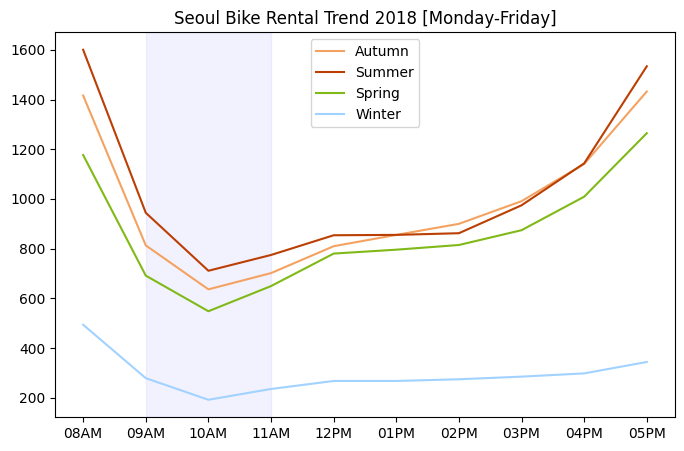

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(g1.index, g1.values, color='#f4a261', label="Autumn")
plt.plot(g2.index, g2.values, color='#bb3e03', label="Summer")
plt.plot(g3.index, g3.values, color='#80b918', label="Spring")
plt.plot(g4.index, g4.values, color='#a2d2ff', label="Winter")

plt.legend()
plt.title("Seoul Bike Rental Trend 2018 [Monday-Friday]")
plt.xticks([i for i in range(8, 18)], labels=["08AM","09AM","10AM","11AM","12PM","01PM","02PM","03PM","04PM","05PM"])

ax.axvspan(9, 11, color="blue", alpha=0.05)

plt.savefig("rental_seasons.png")